In [1]:
import rasterio
from rasterio.plot import show , show_hist

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import os

In [2]:
FOLDER_PATH = '../data/transformer_data/sen12floods_s2_source/sen12floods_s2_source_0331_2019_03_15'

In [3]:
band_list = ['B02.tif' , 'B03.tif' , 'B04.tif' , 'B08.tif']

In [4]:
arrs = []
for band in band_list :
    band_path = os.path.join(FOLDER_PATH, band)
    print(band_path)
    with rasterio.open(band_path) as f:
        arrs.append(f.read(1))


sent_img = np.array(arrs, dtype = arrs[0].dtype)
sent_img.shape

../data/transformer_data/sen12floods_s2_source/sen12floods_s2_source_0331_2019_03_15/B02.tif
../data/transformer_data/sen12floods_s2_source/sen12floods_s2_source_0331_2019_03_15/B03.tif
../data/transformer_data/sen12floods_s2_source/sen12floods_s2_source_0331_2019_03_15/B04.tif
../data/transformer_data/sen12floods_s2_source/sen12floods_s2_source_0331_2019_03_15/B08.tif


(4, 512, 512)

In [8]:
with rasterio.open(f"{FOLDER_PATH}/{band_list[0]}") as src0:
            meta = src0.meta
meta.update(count = len(band_list))

In [12]:
with rasterio.open(f"{FOLDER_PATH}/stacked.tif", "w", **meta) as dst:
    dst.write(sent_img.astype('uint8'))

In [13]:
import cv2

In [14]:
sent_img = cv2.imread(f'{FOLDER_PATH}/stacked.tif')

In [16]:
np.amax(sent_img)

0

In [44]:
# clipped_img = sent_img[:, 0:750:, 0:1500]
# clipped_img.shape

In [45]:
# clipped_img


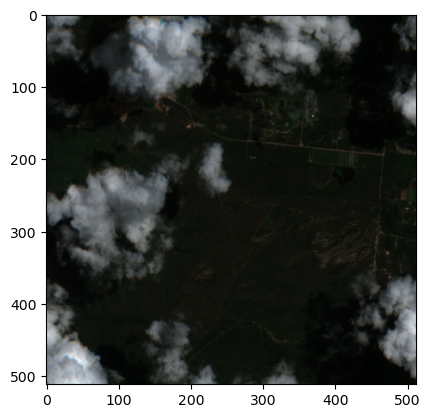

<Axes: >

In [46]:
show((sent_img[[2,1,0], :, :]/np.amax(sent_img)))